The 2001 Bhuj, Gujarat Earthquake is one of the biggest events in the history of India that had a moment magnitude of 7.7. It occurred at 08:46 A.M. IST on India's 52nd Republic Day.

Link to Wikipedia article: https://en.wikipedia.org/wiki/2001_Gujarat_earthquake

In this notebook, our goal is to analyze the energy pattern during the main event and the pattern of aftershocks in the following weeks. Let's begin by importing the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

Next, we request event waveform data from IRIS DMC at IU.MAKZ.00.BHZ.

Set search parameters.

In [2]:
network = "IU"
station = "MAKZ"
location = "00"
channel = "BHZ"
startt = UTCDateTime("2001-01-26T03:16:00")
endt = UTCDateTime("2001-01-26T04:16:00")
st = client.get_waveforms(network, station, location, channel, startt, endt)

Extract a seismic trace from the stream.

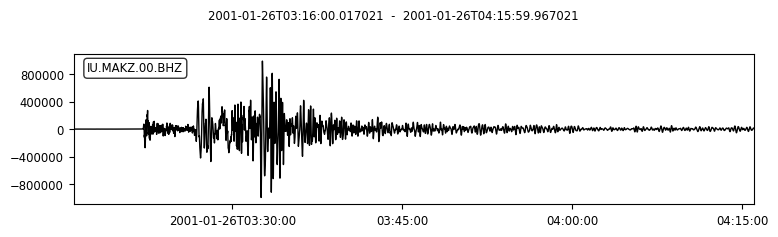

In [3]:
tr = st[0]
fig = tr.plot()

Next, we plot the spectrogram to visualise the pattern of energy bursts during the event.

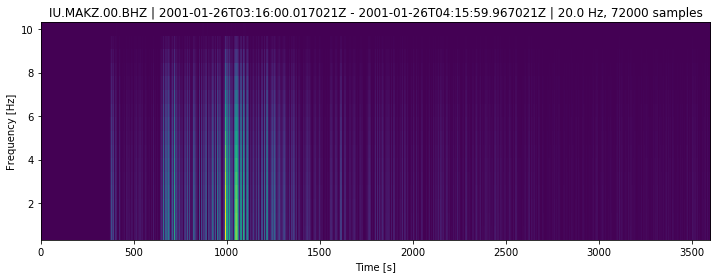

In [4]:
plt.rcParams['figure.figsize'] = (12, 4)
tr.spectrogram(per_lap = .5, wlen = 0.2)

In the above spectrogram, each window is 0.2 seconds long and percent overlap of sliding window is 50. The energy contents seem to lie over the entire spectral range. There doesn't seem to be any abrupt energy burst. Most of the energy contents lie between 600-1500 seconds. The energy bursts seem to fade with time.  

Next, we are going to plot the spectrogram in the logarithmic and dB scales with a window length of 10 seconds. 

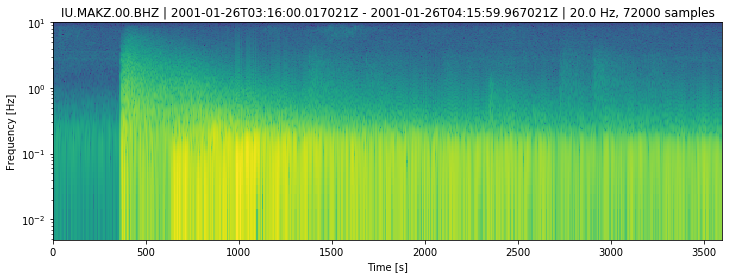

In [5]:
plt.rcParams['figure.figsize'] = (12, 4)
tr.spectrogram(per_lap = .5, wlen = 10, log = True, dbscale = True)

Following the mainshock, around 1800 aftershocks were recorded by a local network in the next three weeks. We are going to fetch the catalog for this earthquake and visualise the aftershock pattern next.

In [6]:
startt = UTCDateTime("2001-01-26T04:00:00")
endt = UTCDateTime("2001-02-15T04:00:00")
maxrad = 1.0
lat = 23.442
lon = 70.31
minmag = 2.0
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="ISC")

In [7]:
print(cat)

377 Event(s) in Catalog:
2001-02-15T03:21:18.960000Z | +23.222,  +70.027 | 3.6 mb
2001-02-15T02:24:03.700000Z | +23.401,  +70.352 | 3.7 ML
...
2001-01-26T04:23:42.340000Z | +23.421,  +70.119 | 5.2 mb
2001-01-26T04:19:49.600000Z | +23.509,  +70.166 | 3.9 ML
To see all events call 'print(CatalogObject.__str__(print_all=True))'


The next part of the processing will be to create a pair of lists (1 column arrays) that will contain the origin time and the event magnitudes. 

In [8]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
mtimes = mdates.date2num(times)
print(times[0],mags[0])
print(mtimes[0],mags[0])

2001-02-15 03:21:18.960000 3.6
730531.139803 3.6


Plot the magnitudes of the events in the catalog over the mentioned period of time.

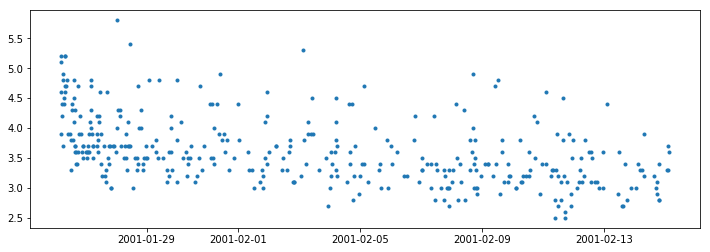

In [9]:
fig1 = plt.subplots(1,1)
plt.plot_date(mtimes,mags,marker='.')
plt.show()

The plot shows there were several magnitude > 3.5 events in the next 2-3 days following the mainshock. 

The next plot analyzes the seismicity rate in the next three weeks following the main event on 26th January, 2001.

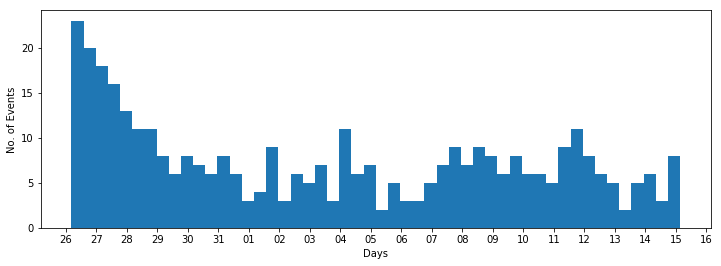

In [10]:
fig2, axes = plt.subplots(1,1)
axes.set(xlabel="Days",
        ylabel="No. of Events")
axes.hist(mtimes, bins=50)
axes.xaxis.set_major_locator(mdates.DayLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.show()

From the above plot, we conclude that the seismicity rate gradually decreased over time following the mainshock.